In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
X_train = np.load('Data/X_train.npy', allow_pickle= True)
y_train = np.load('Data/Y_train.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

651 651 280 280


# K Nearest Neighbours Classifier

Best parameters set found on development set:
 {'n_neighbors': 21, 'p': 1, 'weights': 'distance'}

 Best Score 0.6804736472049231

 Grid scores on development set:
0.595 (+/-0.039) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.600 (+/-0.039) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.602 (+/-0.032) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.609 (+/-0.031) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.604 (+/-0.031) for {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
0.611 (+/-0.031) for {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
0.576 (+/-0.044) for {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
0.608 (+/-0.033) for {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.575 (+/-0.007) for {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
0.607 (+/-0.035) for {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
0.571 (+/-0.015) for {'n_neighbors': 4, 'p': 3, 'weights': 'uniform'}
0.623 (+/-0.031) for {'n_neighbors': 4, 'p': 3, 'weights': 'd

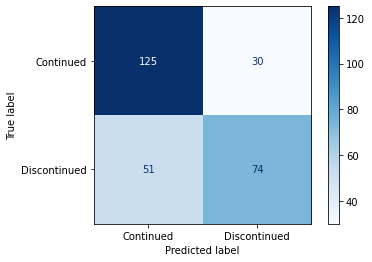

In [3]:
from sklearn.neighbors import KNeighborsClassifier #import the KNN classifier

tuned_parameters = [{
    'n_neighbors': [i for i in range(3,31,1)], 
    'p':  [k for k in range(1,4,1)],
    'weights' : ['uniform', 'distance']
    }]
#p = 1 (manhattan_distance)
#p = 2 (euclidean_distance)
#p = 3 (minkowski_distance)
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

# With SMOTE Oversampling

In [4]:
X_train = np.load('Data/X_train_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

718 718 280 280


Best parameters set found on development set:
 {'n_neighbors': 12, 'p': 2, 'weights': 'distance'}

 Best Score 0.7133967575308982

 Grid scores on development set:
0.666 (+/-0.062) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.698 (+/-0.075) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.653 (+/-0.053) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.677 (+/-0.060) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.668 (+/-0.051) for {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
0.680 (+/-0.063) for {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
0.666 (+/-0.061) for {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
0.705 (+/-0.071) for {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.640 (+/-0.056) for {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
0.689 (+/-0.044) for {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
0.626 (+/-0.057) for {'n_neighbors': 4, 'p': 3, 'weights': 'uniform'}
0.685 (+/-0.043) for {'n_neighbors': 4, 'p': 3, 'weights': 'd

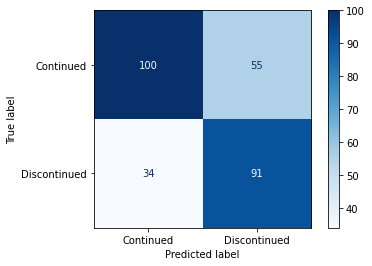

In [5]:
from sklearn.neighbors import KNeighborsClassifier #import the KNN classifier

tuned_parameters = [{
    'n_neighbors': [i for i in range(3,31,1)], 
    'p':  [k for k in range(1,4,1)],
    'weights' : ['uniform', 'distance']
    }]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

# With Borderline-SMOTE Oversampling

In [6]:
X_train = np.load('Data/X_train_borderline_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_borderline_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

718 718 280 280


Best parameters set found on development set:
 {'n_neighbors': 29, 'p': 1, 'weights': 'distance'}

 Best Score 0.7122946388944018

 Grid scores on development set:
0.669 (+/-0.055) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.695 (+/-0.080) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.665 (+/-0.045) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.683 (+/-0.062) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.674 (+/-0.055) for {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
0.686 (+/-0.066) for {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
0.608 (+/-0.054) for {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
0.688 (+/-0.068) for {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.604 (+/-0.048) for {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
0.691 (+/-0.039) for {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
0.611 (+/-0.041) for {'n_neighbors': 4, 'p': 3, 'weights': 'uniform'}
0.693 (+/-0.047) for {'n_neighbors': 4, 'p': 3, 'weights': 'd

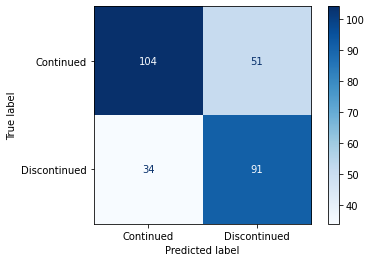

In [7]:
from sklearn.neighbors import KNeighborsClassifier #import the KNN classifier

tuned_parameters = [{
    'n_neighbors': [i for i in range(3,31,1)], 
    'p':  [k for k in range(1,4,1)],
    'weights' : ['uniform', 'distance']
    }]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

# With ADASYN Oversampling

In [8]:
X_train = np.load('Data/X_train_adasyn.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_adasyn.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

FileNotFoundError: [Errno 2] No such file or directory: 'Data/X_train_adasyn.npy'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #import the KNN classifier

tuned_parameters = [{
    'n_neighbors': [i for i in range(2,31,1)], 
    'p':  [k for k in range(1,4,1)],
    'weights' : ['uniform', 'distance']
    }]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)